In [84]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "serif"
plt.rcParams['text.usetex'] = True

from IPython.display import clear_output

In [47]:
def gaussian(x, A, mu, sigma, shift):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2) + shift

In [60]:
def add_text(ax, text, x, y, alpha_x, alpha_y):
    """
    Adds text to an Axes object at a calculated position based on data ranges and relative positions.

    Args:
    ax (matplotlib.axes.Axes): Target Axes for the text.
    text (str): Text to be added.
    x (array-like): X data to determine positioning.
    y (array-like): Y data to determine positioning.
    alpha_x (float): Relative horizontal position within the data range (0 to 1).
    alpha_y (float): Relative vertical position within the data range (0 to 1).
    
    This function positions text relative to the min and max of provided x and y data,
    adjusted by alpha_x and alpha_y, which scale the text's position within the data bounds.
    """
    # Calculate text position from data bounds and relative positioning
    x_pos = np.min(x) + alpha_x * (np.max(x) - np.min(x))
    y_pos = np.min(y) + alpha_y * (np.max(y) - np.min(y))

    # Add text at calculated position with predefined style
    ax.text(
        x_pos, y_pos, text, fontsize=10, color='black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 4, 'edgecolor': 'black'}
    )

In [51]:
data = pd.read_csv("data/hom_data.txt", sep=r'\s+', skiprows=5, index_col=None, header=None, names=[
    "position", "ch0", "ch1", "ch2", "ch3", "ch4", "ch5", "ch6", "ch7", "ch8", "ch9", "ch10", "ch11", "ch12", "ch13", "ch14"
])
data = data.iloc[:, [0,1,2,5]]

x = data.position * 1e3
y0 = data.ch0 * 1e-3
y1 = data.ch1 * 1e-3
y2 = data.ch4 * 1e-3

In [54]:
# fit gaussian
popt, pcov = curve_fit(gaussian, x, y2, p0=[-0.4, 55, 10, 0.6])

In [83]:
visibility = 1- (popt[3]+popt[0]) / popt[3]
visibility

0.7180457109642866

In [144]:
pcov[2,2]**0.5 / popt[2]

0.026269372407200967

In [151]:
3e8/(popt[2]*1e-6) / np.sqrt(2) * 1e-13

6.5279745751714255

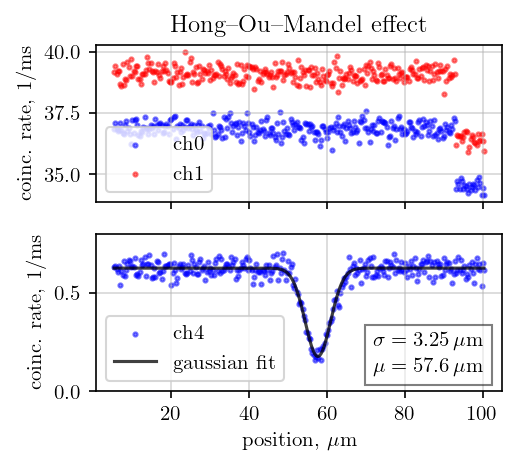

In [158]:
# plot data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.5,3), dpi=150)

ax1.scatter(x, y0, color="blue", label="ch0", alpha=0.5, s=4)
ax1.scatter(x, y1, color="red", label="ch1", alpha=0.5, s=4)
ax1.set_xticklabels([])

ax2.scatter(x, y2, color="blue", label="ch4", alpha=0.5, s=4)
ax2.plot(x, gaussian(x, *popt), color="k", label="gaussian fit", alpha=0.75)
ax2.set_ylim(0,0.8)
ax2.set_xlabel(r"position, $\mu$m")

text_message = rf"$\begin{{array}}{{l}}  \sigma = {popt[2]:.2f}\,\mu\mathrm{{m}}\\ \mu = {popt[1]:.1f}\,\mu\mathrm{{m}}\end{{array}}$"
add_text(ax2, text_message, x, [0, 0.8], 0.7, 0.2)

for ax in [ax1, ax2]:
    ax.grid(alpha=0.5)
    ax.set_ylabel("coinc. rate, 1/ms")
    ax.legend()

ax1.set_title("Hong–Ou–Mandel effect")
plt.savefig("hom_plot.pdf", bbox_inches='tight')
# plt.tight_layout()
plt.show()